# Hyperparameter Tuning

For each of previously selected models we will perform hyperparameter tuning using the Bayesian Optimization method.

We have created HyperparameterTuner classes for each model, which will be used to perform the hyperparameter tuning.

## Load data

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from src.features.helpers.load_data import load_data
from src.models.model_2.model.pipelines import pipeline
import pandas as pd

train_data, augmented_data, test_data = load_data('1_00h')

all_train_data_transformed = pipeline.fit_transform(pd.concat([train_data, augmented_data]))

X_train = all_train_data_transformed.iloc[:len(train_data)].drop(columns=['bg+1:00'])
y_train = all_train_data_transformed.iloc[:len(train_data)]['bg+1:00']

X_augmented = all_train_data_transformed.iloc[len(train_data):].drop(columns=['bg+1:00'])
y_augmented = all_train_data_transformed.iloc[len(train_data):]['bg+1:00']

### HistGradientBoostingRegressor Hyperparameter Tuning

RMSE: 1.4611029397279351
R2 Score: 0.7790285485484115


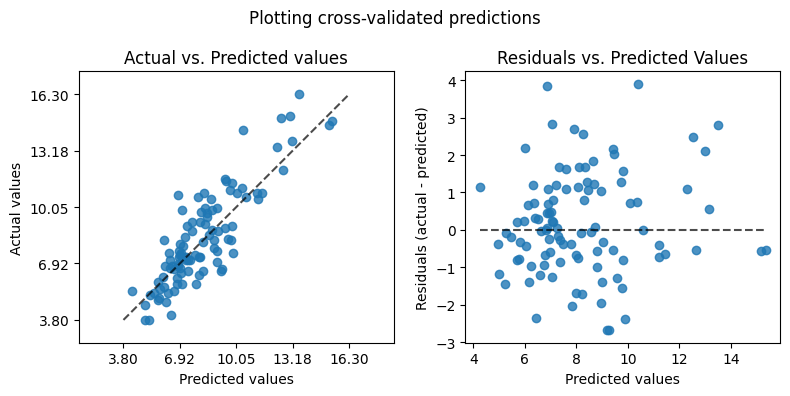

,0
l2_regularization,0.000100
learning_rate,0.166051
max_depth,8.000000
max_iter,1500.000000
max_leaf_nodes,30.000000
min_samples_leaf,15.000000
n_iter_no_change,15.000000
validation_fraction,0.100000


In [3]:
from sklearn.ensemble import HistGradientBoostingRegressor
from skopt.space import Real, Integer
from helpers import tune_hyperparameters

search_space = {
    'learning_rate': Real(0.005, 0.3, prior='log-uniform'),
    'max_iter': Integer(100, 1500),
    'max_depth': Integer(6, 8),
    'min_samples_leaf': Integer(15, 30),
    'max_leaf_nodes': Integer(10, 30),
    'l2_regularization': Real(1e-4, 1e-2, prior='log-uniform'),
    'n_iter_no_change': Integer(10, 15),
    'validation_fraction': Real(0.1, 0.3),
}

model = HistGradientBoostingRegressor(
    scoring='neg_mean_squared_error',
    max_bins=255,
    random_state=42
)

_, best_params = tune_hyperparameters(
    model, search_space,
    X_train, y_train,
    X_augmented, y_augmented,
    num_iter=50, n_splits=5,
    verbose=False, show_results=True
)

pd.DataFrame(best_params, index=[0]).T

### KNeighborsRegressor Hyperparameter Tuning


RMSE: 0.06926307319532808
R2 Score: 0.9995034327722873


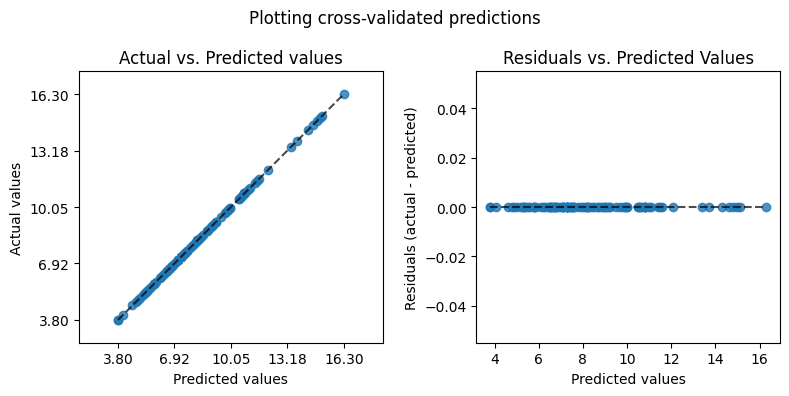

,0
leaf_size,10
metric,minkowski
n_neighbors,3
p,1
weights,distance


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Categorical
from helpers import tune_hyperparameters

search_space = {
    'n_neighbors': Integer(3, 15),
    'weights': Categorical(['uniform', 'distance']),
    'p': Categorical([1, 2]),
    'metric': Categorical(['minkowski', 'euclidean', 'chebyshev']),
    'leaf_size': Integer(10, 50),
}

model = KNeighborsRegressor(n_jobs=-1)
_, best_params = tune_hyperparameters(
    model, search_space,
    X_train, y_train,
    X_augmented, y_augmented,
    num_iter=50, n_splits=5,
    verbose=False, show_results=True
)

pd.DataFrame(best_params, index=[0]).T

### LassoLarsICRegressor Hyperparameter Tuning

RMSE: 2.13674986642704
R2 Score: 0.5274128483110203


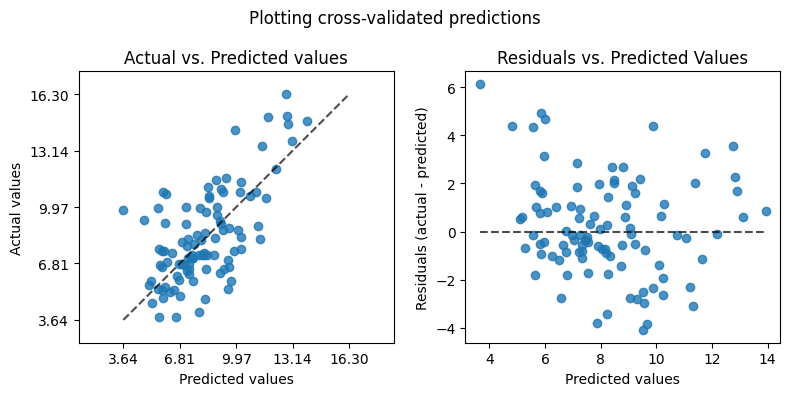

,0
criterion,aic
eps,0.039229
max_iter,1944
noise_variance,0.000054
positive,False


In [5]:
from sklearn.linear_model import LassoLarsIC
from skopt.space import Categorical, Real, Integer
from helpers import tune_hyperparameters

search_space = {
    'criterion': Categorical(['aic', 'bic']),
    'eps': Real(1e-6, 1e-1, prior='log-uniform'),
    'max_iter': Integer(1000, 10000),
    'noise_variance': Real(1e-6, 1e-2, prior='log-uniform'),
    'positive': Categorical([True, False]),
}

model = LassoLarsIC()
_, best_params = tune_hyperparameters(
    model, search_space,
    X_train, y_train,
    X_augmented, y_augmented,
    num_iter=50, n_splits=5,
    verbose=False, show_results=True
)

pd.DataFrame(best_params, index=[0]).T

### XGBRegressor Hyperparameter Tuning

In [ ]:
from xgboost import XGBRegressor
from skopt.space import Integer, Real
from helpers import tune_hyperparameters

search_space = {
    'n_estimators': Integer(1500, 5000),
    'learning_rate': Real(0.01, 0.05, 'log-uniform'),
    'max_depth': Integer(3, 10),
    'min_child_weight': Integer(2, 7),
    'subsample': Real(0.5, 0.8),
    'colsample_bytree': Real(0.6, 0.9),
    'gamma': Real(0.1, 2, 'log-uniform'),
    'reg_alpha': Real(1, 50, 'log-uniform'),
    'reg_lambda': Real(1, 20, 'log-uniform'),
}
model = XGBRegressor(random_state=42, n_jobs=-1)
_, best_params = tune_hyperparameters(
    model, search_space,
    X_train, y_train,
    X_augmented, y_augmented,
    num_iter=50, n_splits=5,
    verbose=False, show_results=True
)

pd.DataFrame(best_params, index=[0]).T